In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
from visualize_samples import plot_fp_act
import pickle
%matplotlib inline

## Evaluation

In [3]:
%load_ext autoreload
%autoreload 2
from evaluate_prediction import evaluate_prediction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pred_results_datapath_list = ['sample_results/all_lite_samp_mu_cov_test_s2_w80_batch0.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch1.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch2.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch3.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch4.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch5.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch6.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch7.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch8.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch9.pkl',
                              'sample_results/all_lite_samp_mu_cov_test_s2_w80_batch10.pkl']

eval_cls = evaluate_prediction(pred_results_datapath_list = pred_results_datapath_list,
                               actual_track_datapath = '../../DATA/DeepTP/processed_flight_tracks.csv',
                               flight_plan_datapath = '../../DATA/DeepTP/processed_flight_plans.csv',
                               flight_plan_utilize_datapath = '../../DATA/DeepTP/IAH_BOS_Act_Flt_Trk_20130101_1231.CSV',
                               feed_track_datapath = '../../DATA/DeepTP/test_flight_tracks_all.csv',
                               feed_fp_datapath = '../../DATA/DeepTP/test_flight_plans_all.csv',
                               n_mix = 3,
                               search_pwr = 2,
                               pred_dt = 120.)

In [60]:
avg_horizontal_err, avg_vertical_err, all_hor_err, all_alt_err = eval_cls.prediction_error(predictions = eval_cls.preds)

In [14]:
import matplotlib.pyplot as plt

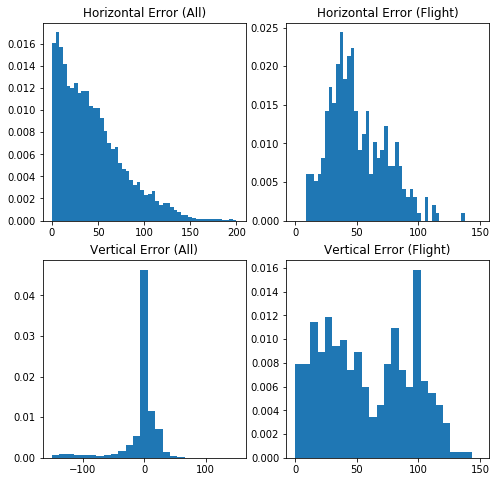

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(8,8), facecolor='w', edgecolor='k')
axs = axs.ravel()
_ = axs[0].hist(all_hor_err, 50, range = (0, 200), density = True)
_ = axs[0].set_title('Horizontal Error (All)')
_ = axs[1].hist(avg_horizontal_err, 50, range = (0, 150), density = True)
_ = axs[1].set_title('Horizontal Error (Flight)')
_ = axs[2].hist(all_alt_err, 25, range = (-150, 150), density = True)
_ = axs[2].set_title('Vertical Error (All)')
_ = axs[3].hist(avg_vertical_err, 25, range = (0, 150), density = True)
_ = axs[3].set_title('Vertical Error (Flight)')

/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


567 flights filed flight plan FP_00001


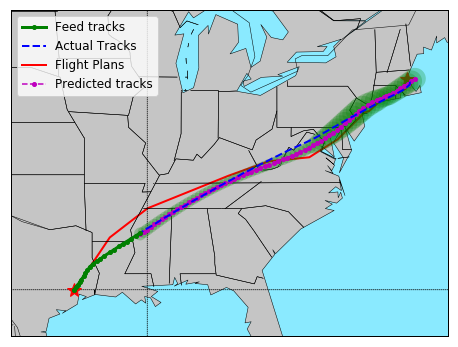

In [104]:
best_seq_idx = eval_cls._best_sequence_idx(eval_cls.pred_logprobs)
k = 16
fid_fp = eval_cls.feed_fp.groupby(['FLT_PLAN_ID', 'FLT_PLAN_ID_REAL']).head(1)[['FLT_PLAN_ID', 'FLT_PLAN_ID_REAL']].values[k]

plot_track, plot_fp = plot_fp_act(fid_fp[1], 
                                  FP_utlize, 
                                  act_track_data.loc[act_track_data.FID == fid_fp[0]], 
                                  feed_fp.loc[feed_fp.FLT_PLAN_ID == fid_fp[0]], 
                                  feed_track = feed_data.loc[feed_data.FID == fid_fp[0]], 
                                  pred_track=None, 
                                  pred_track_mu = eval_cls.preds[:, 20:, ],
                                  pred_track_cov = eval_cls.pred_covs,
                                  k = best_seq_idx[k],
                                  nstd = 3,
                                  sort = False)

/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


28 flights filed flight plan FP_00009


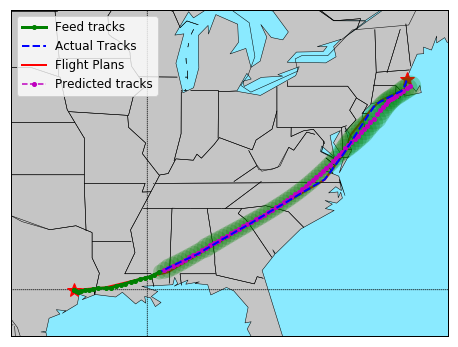

In [106]:
best_seq_idx = eval_cls._best_sequence_idx(eval_cls.pred_logprobs)
k = 35
fid_fp = eval_cls.feed_fp.groupby(['FLT_PLAN_ID', 'FLT_PLAN_ID_REAL']).head(1)[['FLT_PLAN_ID', 'FLT_PLAN_ID_REAL']].values[k]

plot_track, plot_fp = plot_fp_act(fid_fp[1], 
                                  FP_utlize, 
                                  act_track_data.loc[act_track_data.FID == fid_fp[0]], 
                                  feed_fp.loc[feed_fp.FLT_PLAN_ID == fid_fp[0]], 
                                  feed_track = feed_data.loc[feed_data.FID == fid_fp[0]], 
                                  pred_track=None, 
                                  pred_track_mu = eval_cls.preds[:, 20:, ],
                                  pred_track_cov = eval_cls.pred_covs,
                                  k = best_seq_idx[k],
                                  nstd = 3,
                                  sort = False)

/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/liuyulin/anaconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


457 flights filed flight plan FP_00002


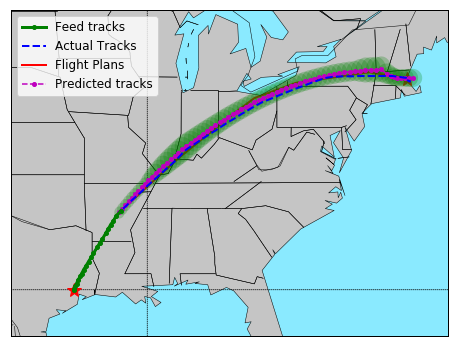

In [108]:
best_seq_idx = eval_cls._best_sequence_idx(eval_cls.pred_logprobs)
k = 0
fid_fp = eval_cls.feed_fp.groupby(['FLT_PLAN_ID', 'FLT_PLAN_ID_REAL']).head(1)[['FLT_PLAN_ID', 'FLT_PLAN_ID_REAL']].values[k]

plot_track, plot_fp = plot_fp_act(fid_fp[1], 
                                  FP_utlize, 
                                  act_track_data.loc[act_track_data.FID == fid_fp[0]], 
                                  feed_fp.loc[feed_fp.FLT_PLAN_ID == fid_fp[0]], 
                                  feed_track = feed_data.loc[feed_data.FID == fid_fp[0]], 
                                  pred_track=None, 
                                  pred_track_mu = eval_cls.preds[:, 20:, ],
                                  pred_track_cov = eval_cls.pred_covs,
                                  k = best_seq_idx[k],
                                  nstd = 3,
                                  sort = False)